In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from glove import hac, sfms

In [2]:
# graph settings...
plt.rcParams["axes.labelsize"] = "large"
plt.rcParams["axes.titlesize"] = "x-large"
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 7
plt.rcParams["ytick.major.size"] = 7
plt.rcParams["xtick.minor.size"] = 4
plt.rcParams["ytick.minor.size"] = 4
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True

In [3]:
df = pd.read_csv("target_init_COSMOS.csv")

In [4]:
df.head(10)

,ID,RA,Dec,Redshift,logMass,SFR,restUV,e_restUV,restVJ,e_restVJ,logLHa,logLIR,mu0_f200w
0,66,150.17529,2.23145,1.6746,9.220,2.916,0.42,0.09,0.21,0.14,8.194,10.324,20.7260
1,80,150.17028,2.23205,2.4342,9.428,15.974,0.40,0.25,0.16,0.23,8.782,11.185,20.6762
2,85,150.17089,2.23178,1.5955,9.546,7.151,0.65,0.11,0.41,0.11,8.355,10.796,20.8792
3,107,150.17127,2.23263,1.3368,9.719,1.479,1.15,0.19,0.80,0.18,7.672,10.229,20.7917
4,127,150.18001,2.23127,2.5388,11.425,58.685,0.54,0.12,1.36,0.14,9.453,12.048,17.9427
5,162,150.18001,2.23434,1.8542,9.502,3.943,0.59,0.32,0.43,0.15,7.931,10.350,20.3650
6,170,150.17922,2.23368,2.3662,11.035,18.955,1.88,0.11,1.58,0.12,7.830,11.530,20.0396
7,197,150.17068,2.23276,1.5826,10.113,50.926,0.69,0.12,0.89,0.16,8.963,11.697,19.4099
8,210,150.16913,2.23389,1.2228,10.339,20.732,0.81,0.20,0.82,0.13,8.634,11.173,20.2886
9,224,150.16589,2.23533,1.7837,9.843,8.405,1.20,0.17,0.89,0.11,7.812,11.006,20.5275


In [5]:
calc = hac(70, 0.3)

In [6]:
model = sfms()

z_arr = np.arange(3) * 0.50 + 1.25
logMs = np.arange(31) * 0.1 + 9.0

whitaker14 = np.array([])
speagle14 = np.array([])

for z in z_arr:
    var1 = np.array([ model.whitaker14(z, Ms, method="polynomial")
        for Ms in logMs ])
    var2 = model.speagle14(z, logMs)

    whitaker14 = np.append(whitaker14, var1)
    speagle14 = np.append(speagle14, var2)

whitaker14 = whitaker14.reshape(z_arr.size, logMs.size)
speagle14 = speagle14.reshape(z_arr.size, logMs.size)

In [7]:
z_arr

array([1.25, 1.75, 2.25])

## 1) z=1.0-1.5

In [8]:
z_cnd = ((df['Redshift'] >= 1.0) & (df['Redshift'] < 1.5))
print("Redshift range (z=1.0-1.5): ", np.sum(z_cnd), "/", len(df),
      f", z_median = {np.median(df['Redshift'][z_cnd]):.3f}")

Redshift range (z=1.0-1.5):  314 / 922 , z_median = 1.201


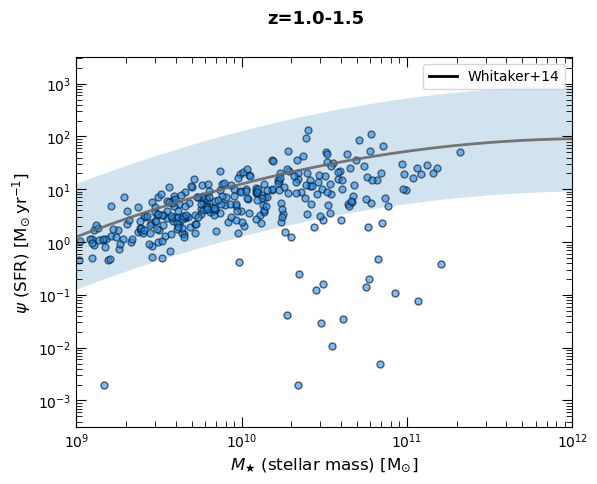

In [9]:
plt.scatter(10**df["logMass"][z_cnd], df["SFR"][z_cnd], s=25, c='dodgerblue', #df["Redshift"][z_cnd],
#     cmap="rainbow",
            edgecolors="k", marker="o", alpha=0.6)
# plt.colorbar(label="redshift $(z)$")

plt.xlabel(r"$M_{\bigstar}$ (stellar mass) [M$_{\odot}$]")
plt.ylabel(r"$\psi$ (SFR) [M$_{\odot}\,$yr$^{-1}$]")

plt.xscale("log")
plt.yscale("log")

plt.xlim([10.**(9.0) , 10.**(12.0)])
plt.ylim([10.**(-3.5), 10.**(3.5)])

plt.suptitle("z=1.0-1.5", fontsize=13.0, fontweight='bold')

plt.axis( plt.axis() )

# for n in range(z_arr.size):
n = 0
plt.plot(10**logMs, 10**whitaker14[n],
    c="dimgray",
#     c=plt.cm.rainbow( plt.Normalize( vmin=np.min(df["Redshift"]), vmax=np.max(df["Redshift"]) )(z_arr[n]) ),
    ls="-", lw=2, alpha=0.9)
#     plt.plot(10**logMs, 10**speagle14[n],
#         c=plt.cm.rainbow( plt.Normalize( vmin=np.min(df["Redshift"]), vmax=np.max(df["Redshift"]) )(z_arr[n]) ),
#         ls="--", lw=2, alpha=0.7)

plt.plot([], [], "k-", lw=2, label="Whitaker+14")
# plt.plot([], [], "k--", lw=2, label="Speagle+14")

plt.fill_between(10**logMs, 10**(whitaker14[n] - 1.0), 10**(whitaker14[n] + 1.0), alpha=0.2)

plt.legend(loc="best")

In [10]:
sfms0 = np.array([model.whitaker14(zz, lMM, method="polynomial") \
                for zz, lMM in zip(df['Redshift'][z_cnd], df['logMass'][z_cnd])])
sfms_cnd = ((df["SFR"][z_cnd] >= 10**(sfms0 - 1.0)) & \
            (df["SFR"][z_cnd] <= 10**(sfms0 + 1.0)))
print(f"Star-forming candidates (z=1.0-1.5): ", np.sum(sfms_cnd), "/", np.sum(z_cnd))

Star-forming candidates (z=1.0-1.5):  290 / 314


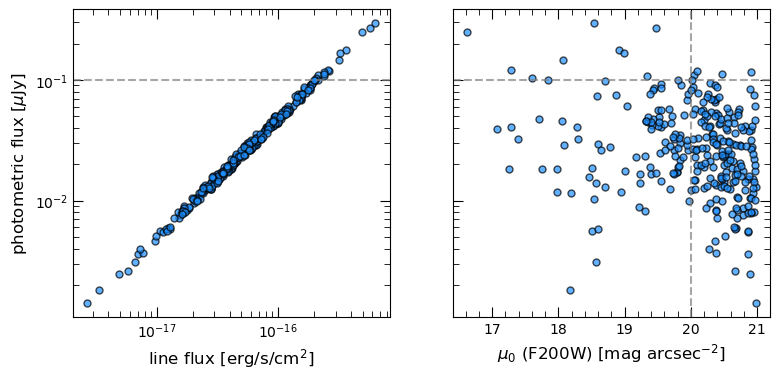

In [11]:
lf = calc.get_lineflux(10**df["logLHa"][z_cnd][sfms_cnd], df["Redshift"][z_cnd][sfms_cnd], units="solLum")
pf = calc.get_photflux(10**df["logLHa"][z_cnd][sfms_cnd], df["Redshift"][z_cnd][sfms_cnd], units="solLum")


fig, axs = plt.subplots(1, 2, figsize=(9,4))

ax = axs[0]
ax.scatter(lf, pf, s=25, c='dodgerblue', edgecolors='k', marker='o', alpha=0.7)

ax.axhline(0.1, 0.0, 1.0, ls='--', lw=1.5, color='gray', alpha=0.7)

ax.set_xlabel("line flux [erg/s/cm$^{2}$]")
ax.set_ylabel("photometric flux [$\mu$Jy]")

ax.set_xscale("log")
ax.set_yscale("log")

ax = axs[1]
ax.scatter(df['mu0_f200w'][z_cnd][sfms_cnd], pf, s=25, c='dodgerblue',
           edgecolors='k', marker='o', alpha=0.7)

ax.axhline(0.1, 0.0, 1.0, ls='--', lw=1.5, color='gray', alpha=0.7)
ax.axvline(20.0, 0.0, 1.0, ls='--', lw=1.5, color='gray', alpha=0.7)

# ax.set_xlabel("line flux [erg/s/cm$^{2}$]")
ax.set_xlabel(r"$\mu_{0}~({\rm F200W})~{\rm [mag~arcsec^{-2}]}$")
# ax.set_ylabel("photometric flux [$\mu$Jy]")
ax.tick_params(labelleft=False)
# ax.set_xscale("log")
ax.set_yscale("log")

In [12]:
obs_cnd = ((pf.value > 0.1) & (df['mu0_f200w'][z_cnd][sfms_cnd] < 20.0))
print(f"Target candidates (z=1.0-1.5): ", np.sum(obs_cnd), "/", np.sum(sfms_cnd), "/", np.sum(z_cnd))

Target candidates (z=1.0-1.5):  10 / 290 / 314


## 2) z=1.5-2.0

In [13]:
z_cnd = ((df['Redshift'] >= 1.5) & (df['Redshift'] < 2.0))
print("Redshift range (z=1.5-2.0): ", np.sum(z_cnd), "/", len(df),
      f", z_median = {np.median(df['Redshift'][z_cnd]):.3f}")

Redshift range (z=1.5-2.0):  336 / 922 , z_median = 1.742


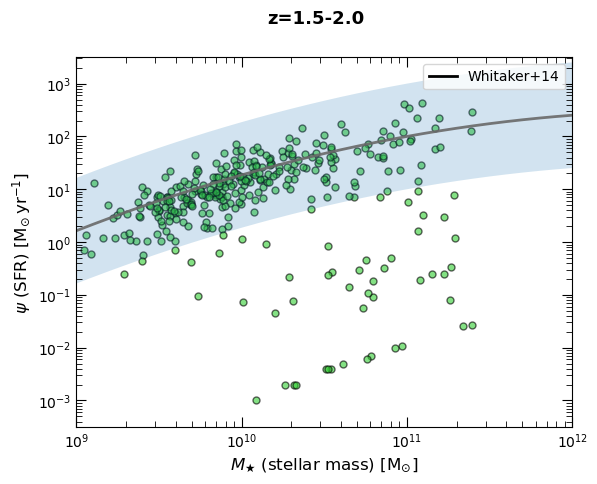

In [14]:
plt.scatter(10**df["logMass"][z_cnd], df["SFR"][z_cnd], s=25, c='limegreen', #df["Redshift"][z_cnd],
#     cmap="rainbow",
            edgecolors="k", marker="o", alpha=0.6)
# plt.colorbar(label="redshift $(z)$")

plt.xlabel(r"$M_{\bigstar}$ (stellar mass) [M$_{\odot}$]")
plt.ylabel(r"$\psi$ (SFR) [M$_{\odot}\,$yr$^{-1}$]")

plt.xscale("log")
plt.yscale("log")

plt.xlim([10.**(9.0) , 10.**(12.0)])
plt.ylim([10.**(-3.5), 10.**(3.5)])

plt.suptitle("z=1.5-2.0", fontsize=13.0, fontweight='bold')

plt.axis( plt.axis() )

# for n in range(z_arr.size):
n = 1
plt.plot(10**logMs, 10**whitaker14[n],
    c="dimgray",
#     c=plt.cm.rainbow( plt.Normalize( vmin=np.min(df["Redshift"]), vmax=np.max(df["Redshift"]) )(z_arr[n]) ),
    ls="-", lw=2, alpha=0.9)
#     plt.plot(10**logMs, 10**speagle14[n],
#         c=plt.cm.rainbow( plt.Normalize( vmin=np.min(df["Redshift"]), vmax=np.max(df["Redshift"]) )(z_arr[n]) ),
#         ls="--", lw=2, alpha=0.7)

plt.plot([], [], "k-", lw=2, label="Whitaker+14")
# plt.plot([], [], "k--", lw=2, label="Speagle+14")

plt.fill_between(10**logMs, 10**(whitaker14[n] - 1.0), 10**(whitaker14[n] + 1.0), alpha=0.2)

plt.legend(loc="best")

In [15]:
sfms0 = np.array([model.whitaker14(zz, lMM, method="polynomial") \
                for zz, lMM in zip(df['Redshift'][z_cnd], df['logMass'][z_cnd])])
sfms_cnd = ((df["SFR"][z_cnd] >= 10**(sfms0 - 1.0)) & \
            (df["SFR"][z_cnd] <= 10**(sfms0 + 1.0)))
print(f"Star-forming candidates (z=1.5-2.0): ", np.sum(sfms_cnd), "/", np.sum(z_cnd))

Star-forming candidates (z=1.5-2.0):  284 / 336


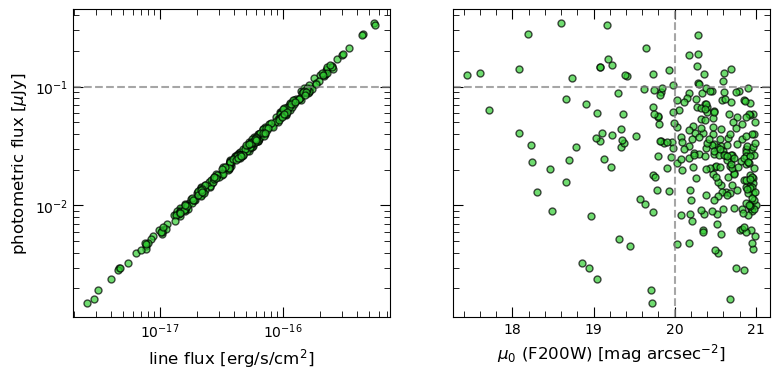

In [16]:
lf = calc.get_lineflux(10**df["logLHa"][z_cnd][sfms_cnd], df["Redshift"][z_cnd][sfms_cnd], units="solLum")
pf = calc.get_photflux(10**df["logLHa"][z_cnd][sfms_cnd], df["Redshift"][z_cnd][sfms_cnd], units="solLum")


fig, axs = plt.subplots(1, 2, figsize=(9,4))

ax = axs[0]
ax.scatter(lf, pf, s=25, c='limegreen', edgecolors='k', marker='o', alpha=0.7)

ax.axhline(0.1, 0.0, 1.0, ls='--', lw=1.5, color='gray', alpha=0.7)

ax.set_xlabel("line flux [erg/s/cm$^{2}$]")
ax.set_ylabel("photometric flux [$\mu$Jy]")

ax.set_xscale("log")
ax.set_yscale("log")

ax = axs[1]
ax.scatter(df['mu0_f200w'][z_cnd][sfms_cnd], pf, s=25, c='limegreen',
           edgecolors='k', marker='o', alpha=0.7)

ax.axhline(0.1, 0.0, 1.0, ls='--', lw=1.5, color='gray', alpha=0.7)
ax.axvline(20.0, 0.0, 1.0, ls='--', lw=1.5, color='gray', alpha=0.7)

# ax.set_xlabel("line flux [erg/s/cm$^{2}$]")
ax.set_xlabel(r"$\mu_{0}~({\rm F200W})~{\rm [mag~arcsec^{-2}]}$")
# ax.set_ylabel("photometric flux [$\mu$Jy]")
ax.tick_params(labelleft=False)
# ax.set_xscale("log")
ax.set_yscale("log")

In [17]:
obs_cnd = ((pf.value > 0.1) & (df['mu0_f200w'][z_cnd][sfms_cnd] < 20.0))
print(f"Target candidates (z=1.5-2.0): ", np.sum(obs_cnd), "/", np.sum(sfms_cnd), "/", np.sum(z_cnd))

Target candidates (z=1.5-2.0):  17 / 284 / 336


## 3) z=2.0-2.5

In [18]:
z_cnd = ((df['Redshift'] >= 2.0) & (df['Redshift'] < 2.5))
print("Redshift range (z=2.0-2.5): ", np.sum(z_cnd), "/", len(df),
      f", z_median = {np.median(df['Redshift'][z_cnd]):.3f}")

Redshift range (z=2.0-2.5):  175 / 922 , z_median = 2.186


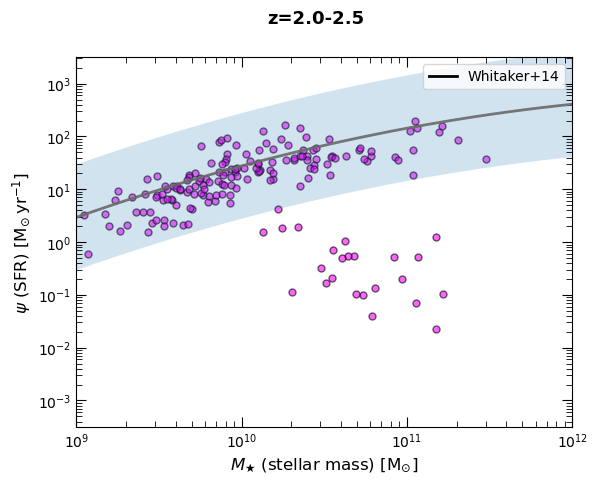

In [19]:
plt.scatter(10**df["logMass"][z_cnd], df["SFR"][z_cnd], s=25, c='magenta', #df["Redshift"][z_cnd],
#     cmap="rainbow",
            edgecolors="k", marker="o", alpha=0.6)
# plt.colorbar(label="redshift $(z)$")

plt.xlabel(r"$M_{\bigstar}$ (stellar mass) [M$_{\odot}$]")
plt.ylabel(r"$\psi$ (SFR) [M$_{\odot}\,$yr$^{-1}$]")

plt.xscale("log")
plt.yscale("log")

plt.xlim([10.**(9.0) , 10.**(12.0)])
plt.ylim([10.**(-3.5), 10.**(3.5)])

plt.suptitle("z=2.0-2.5", fontsize=13.0, fontweight='bold')

plt.axis( plt.axis() )

# for n in range(z_arr.size):
n = 2
plt.plot(10**logMs, 10**whitaker14[n],
    c="dimgray",
#     c=plt.cm.rainbow( plt.Normalize( vmin=np.min(df["Redshift"]), vmax=np.max(df["Redshift"]) )(z_arr[n]) ),
    ls="-", lw=2, alpha=0.9)
#     plt.plot(10**logMs, 10**speagle14[n],
#         c=plt.cm.rainbow( plt.Normalize( vmin=np.min(df["Redshift"]), vmax=np.max(df["Redshift"]) )(z_arr[n]) ),
#         ls="--", lw=2, alpha=0.7)

plt.plot([], [], "k-", lw=2, label="Whitaker+14")
# plt.plot([], [], "k--", lw=2, label="Speagle+14")

plt.fill_between(10**logMs, 10**(whitaker14[n] - 1.0), 10**(whitaker14[n] + 1.0), alpha=0.2)

plt.legend(loc="best")

In [20]:
sfms0 = np.array([model.whitaker14(zz, lMM, method="polynomial") \
                for zz, lMM in zip(df['Redshift'][z_cnd], df['logMass'][z_cnd])])
sfms_cnd = ((df["SFR"][z_cnd] >= 10**(sfms0 - 1.0)) & \
            (df["SFR"][z_cnd] <= 10**(sfms0 + 1.0)))
print(f"Star-forming candidates (z=2.0-2.5): ", np.sum(sfms_cnd), "/", np.sum(z_cnd))

Star-forming candidates (z=2.0-2.5):  152 / 175


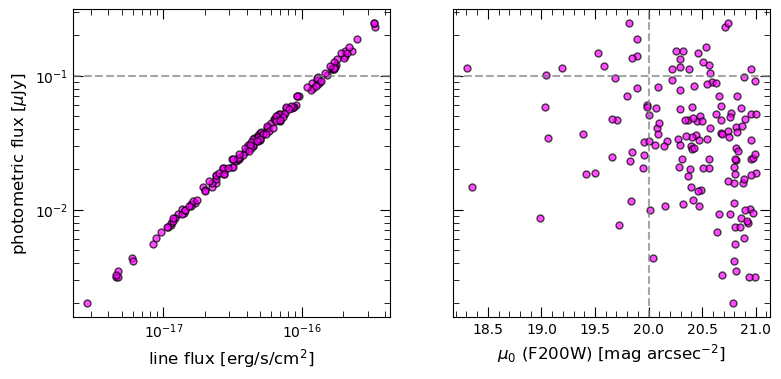

In [21]:
lf = calc.get_lineflux(10**df["logLHa"][z_cnd][sfms_cnd], df["Redshift"][z_cnd][sfms_cnd], units="solLum")
pf = calc.get_photflux(10**df["logLHa"][z_cnd][sfms_cnd], df["Redshift"][z_cnd][sfms_cnd], units="solLum")


fig, axs = plt.subplots(1, 2, figsize=(9,4))

ax = axs[0]
ax.scatter(lf, pf, s=25, c='magenta', edgecolors='k', marker='o', alpha=0.7)

ax.axhline(0.1, 0.0, 1.0, ls='--', lw=1.5, color='gray', alpha=0.7)

ax.set_xlabel("line flux [erg/s/cm$^{2}$]")
ax.set_ylabel("photometric flux [$\mu$Jy]")

ax.set_xscale("log")
ax.set_yscale("log")

ax = axs[1]
ax.scatter(df['mu0_f200w'][z_cnd][sfms_cnd], pf, s=25, c='magenta',
           edgecolors='k', marker='o', alpha=0.7)

ax.axhline(0.1, 0.0, 1.0, ls='--', lw=1.5, color='gray', alpha=0.7)
ax.axvline(20.0, 0.0, 1.0, ls='--', lw=1.5, color='gray', alpha=0.7)

# ax.set_xlabel("line flux [erg/s/cm$^{2}$]")
ax.set_xlabel(r"$\mu_{0}~({\rm F200W})~{\rm [mag~arcsec^{-2}]}$")
# ax.set_ylabel("photometric flux [$\mu$Jy]")
ax.tick_params(labelleft=False)
# ax.set_xscale("log")
ax.set_yscale("log")

In [22]:
obs_cnd = ((pf.value > 0.1) & (df['mu0_f200w'][z_cnd][sfms_cnd] < 20.0))
print(f"Target candidates (z=2.0-2.5): ", np.sum(obs_cnd), "/", np.sum(sfms_cnd), "/", np.sum(z_cnd))

Target candidates (z=2.0-2.5):  9 / 152 / 175
